In [1]:
import pandas as pd
import numpy as np

In [ ]:
user_cols = ['user_id','age','gender','occupation','zip-code']
users = pd.read_table('http://bit.ly/movieusers',sep='|', names=user_cols, index_col='user_id',header=None)

In [ ]:
users.head()

In [ ]:
users.shape

In [ ]:
users.dtypes

In [ ]:
users.describe()

In [ ]:
users.describe(include=['object','int64'])

In [ ]:
users.columns

In [ ]:
users.rename(columns={'gender':'Sex','zip_code':'pincode'}, inplace=True)

In [ ]:
users.columns

#### Chaning the header name at the time of import

In [ ]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
ufo.columns

In [ ]:
# NOw we will try to change it read time itself
ufo_read = ['City', 'Colors_reported', 'Shape_reported', 'State', 'Time']
ufo = pd.read_csv('http://bit.ly/uforeports', names=ufo_read, header = 0)
ufo.columns

In [ ]:
ufo.columns = ufo.columns.str.replace('_','__')
ufo.columns

YOu can pick up a series  then .str and then apply any of the string methods

####  Sorting a pandas series and dataframe

user sort_value() function

In [ ]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [ ]:
movies.head()

In [ ]:
# Soritng the series but not affecting the underlying dataframe
# movies.duration.sort_values(ascending=False) 

In [ ]:
# Sorting the dataframe
movies.sort_values(by=['genre','duration'], ascending=[False,True]).head()

#### Filter rows of a dataframe by column values

In [ ]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [ ]:
movies.loc[movies.duration >=200, 'genre']

In [ ]:
movies.loc[(movies.duration >= 200) & (movies.genre =='Drama'), 'genre']


In [ ]:
movies.loc[(movies.duration >= 200) & (movies.genre.isin( ['Drama'])), ['genre','duration']]

#### Iterration over the rows of pandas dataframe

In [ ]:
#  Uncomment to iterrate rowwisw on a pandas dataframe

# for i, row in movies.iterrows():
#     print(i)
# #     print(row)

In [ ]:
#  axis 0 is euivalent to 'index'  and axis value 1 is equivalent to 'columns'
movies.mean(axis='index')
movies.mean(axis=0)
movies.mean(axis='columns')
movies.mean(axis=1).head()

#### Use string 'str' methods in pandas
To use string methods in pandas we use 'str' 

In [ ]:
order = pd.read_table('http://bit.ly/chiporders')

In [ ]:
order.head()

In [ ]:
# suppose we want to make the item_name as upper case

# order.item_name.str.upper()
# order.item_name.str.contains('chicken')
order.choice_description.str.replace(r'[\[\]]',"").head()

#### change the dtype for a series in dataframe

In [ ]:
import numpy as np
order.quantity =order.quantity.astype(np.float32,inplace=True)
print(order.quantity.dtype)

In [ ]:
order.item_price = order.item_price.str.replace('$','')
order.item_price = order.item_price.astype(np.float16)
print(order.item_price.dtype)
order.item_price.head()

In [ ]:
order.item_name.str.contains('chicken').astype(int).head()

#### groupby in pandas

In [ ]:
drinks = pd.read_table('http://bit.ly/drinksbycountry',sep=',')

In [ ]:
drinks.head()

In [ ]:
drinks.groupby('continent').sum()#.sum(axis=1)#.mean()#.head()

In [ ]:
drinks.groupby('continent').agg(['mean','count', 'min','max','sum'])

In [ ]:
%matplotlib inline

In [ ]:
drinks.groupby('continent').mean().plot(kind='bar',stacked=True)

In [ ]:
# to get the index of row for which the max values is found
drinks.groupby('continent').idxmax()

In [ ]:
# this can be done to get the country name directly for the max serving for each spirit type:
#  but HERE THE ASSUMPTION IS COUNTRY ARE UNIQUE IN EACH ROW.
drinks.set_index('country').groupby('continent').idxmax()

In [ ]:
# for single spirit this can be used even in case of reapeated countries ie. country not neccessary be unique
drinks.loc[drinks.reset_index().groupby('continent').beer_servings.idxmax()]

In [13]:
drinks.loc[drinks.groupby('continent').beer_servings.idxmax()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa
141,Russian Federation,247,326,73,11.5,Asia
45,Czech Republic,361,170,134,11.8,Europe
130,Panama,285,104,18,7.2,North America
129,Palau,306,63,23,6.9,Oceania
188,Venezuela,333,100,3,7.7,South America


####  Explore a pandas Series

In [ ]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [ ]:
movies.head()

In [ ]:
# gets the count of each values ie. how many times that value has appeared in the series
movies.genre.value_counts(normalize=True)

In [ ]:
#  need to run %matplpotlib inline before for plots to appear in  notebook
movies.genre.value_counts().plot(kind='bar')

In [ ]:
movies.genre.unique()

In [ ]:
movies.genre.nunique()

In [ ]:
#  to see the cor relation between two catgegorical series 

pd.crosstab(movies.genre,movies.content_rating)

In [ ]:
# For visualization we can use seaborn heatmaps.
import seaborn as sns
sns.heatmap(pd.crosstab(movies.genre,movies.content_rating))

####  Handle Missing values 

In [ ]:
import pandas as pd

In [ ]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
ufo.tail()

In [ ]:
ufo.isnull().tail()

In [ ]:
ufo.notnull().tail()

In [ ]:
print(ufo.dropna(how='all').shape)
print(ufo.dropna().shape)
# drop a row for a subset of columns
print(ufo.dropna(subset=['City','Shape Reported'], how='any').shape)

In [ ]:
# to get the cound of all values along with NaN. observe that count of Nan is also given
ufo['Shape Reported'].value_counts(dropna=False).head()

In [ ]:
ufo['Shape Reported'].fillna(value='Various', inplace=True)

#### Indexes in pandas
WHY index exist?
1. __selection__
2. __identification__
3. __alignment__

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
drinks.head()

In [ ]:
drinks.columns

In [ ]:
drinks.index

In [ ]:
drinks.set_index('country', inplace=True)
drinks.head()

In [ ]:
drinks.index

In [ ]:
drinks.loc['Brazil', 'beer_servings']

In [ ]:
drinks.index.name

In [ ]:
drinks.index.name = None
drinks.head()

In [ ]:
drinks.index.name= 'country'
drinks.reset_index(inplace=True)
drinks.head()

In [ ]:
drinks.set_index('country', inplace=True)
drinks.head()

In [ ]:
drinks.continent.value_counts()

In [ ]:
drinks.continent.value_counts().loc['Africa']
# or drinks.continent.value_counts().['Africa']

In [ ]:
drinks.continent.value_counts().values

In [ ]:
drinks.continent.value_counts().index

In [ ]:
drinks.continent.value_counts().sort_values()

In [ ]:
drinks.continent.value_counts().sort_index()

#### Index for alignment

In [ ]:
# to demonstrate that we will be creating a dummy Series
# pd.DataFrame([[],[]],columns=[],)
people = pd.Series([300000,85000], index=['Albania', 'Andorra'], name='Population')
people

In [ ]:
# suppose to get the total beer_servings - we multiply the average with population
(drinks.beer_servings*people).head()

In [ ]:
pd.concat([drinks,people], axis=1,sort=False).head()

#### Difference b/w loc, iloc, ix

- loc  - is for referencing with name - both row and columns wise very helpful when index is non numeric
- iloc - is for referencing with order - like 50th row and 2nd column 
- ix - is deprecated avoid using it

In [ ]:
drinks.iloc[50,0:3]

In [ ]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
ufo.head(3)

In [ ]:
ufo.loc[[0,1,2],:]

In [ ]:
# Note in : indexing in pandas boundary conditions are inclusivie .ie in 0:2 - 2 is inclusive here
ufo.loc[0:2,:]

In [ ]:
# omitted index defaults to all
ufo.loc[0:2]

In [ ]:
ufo.loc[:,['City','State']].head()

In [ ]:
# Through statement in columns
ufo.loc[:,'City':'State'].head()

In [ ]:
# iloc  is for filtering rows and columsn by position from top to bottom and left to right
ufo.iloc[:,[0,3]].head()

In [ ]:
# with iloc it is exclusive of ending number like usual : notation in python ie in iloc 0:4 , 4 is exclusive in iloc but not in loc
ufo.iloc[:,0:4].head()

In [ ]:
# Beware of these shortcuts this notation is refering to loc with all rows and specified columns
ufo[['City','State']].head()
#  is equivalent to   ufo.loc[:,['City','State']].head()

In [ ]:
# # Beware of these shortcuts this notation is refering to iloc with all columns and specified rows exclusive of ending row
ufo[0:2]
#  is equivalent to ufo.iloc[0:2,:]

In [ ]:
#  ix allows you to mix - loc and iloc
drinks.ix['Albania',0]

####  Memmory Usage in pandas

In [ ]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [ ]:
drinks.info()

- Observe here the Memory usage is given as 9.1+ KB i.e it is minimum 9.1 KB <br>
__But why is that approx. why pandas doen't tell the exact memory?__
- It turns out that, if you look closely you will find that there ar 2 series in our dataframe which are of type object. and in python an object can be anythin and pandas wants info() function to run faster so it just calculates the space used for the reference to the object and NOT THE ACTUAL SPACE USED BY THOSE OBJECTS

In [ ]:
# we need to specify explicitly to get the full memory usage
drinks.info(memory_usage='deep')

In [ ]:
#  give the memory usage for each series (columns). But again it is not deep
drinks.memory_usage()

In [ ]:
drinks.memory_usage(deep=True)

To reduce the size of dataframe we can convert categorical variables of object type of 'category type

In [ ]:
drinks.continent = drinks.continent.astype('category')

In [ ]:
drinks.continent.head()

In [ ]:
# to the codes for category dtypes use 'cat' like 'str' is used for string operations
drinks.continent.cat.codes.head()

In [ ]:
drinks.continent.cat.categories

In [ ]:
# now if check the memory usage for drinks
drinks.memory_usage(deep=True)

Observe the considerable memory usage in continent column after it has been converted to 'category' dtype

#### We can specify the order also for category dtypes

In [ ]:
df = pd.DataFrame({'Id':[100,101,102,103], 'quality':['good','good','very good','excellent']})

In [ ]:
df.sort_values('quality')    # Here quality is sorted alpahbetically

In [ ]:
df.quality = df.quality.astype('category',categories=['good','very good','excellent'],ordered=True)

In [ ]:
# to overcome above warning use below code

from pandas.api.types import CategoricalDtype
df['quality']=df.quality.astype(CategoricalDtype(['good','very good','excellent'], ordered=True))

In [ ]:
df.sort_values('quality')  #Now the values are order in categorical preference order

In [ ]:
df.loc[df.quality >'good',:]

In [ ]:
# to get the some sample out of dataframe

In [ ]:
drinks.sample(n=4)  #get random 4 rows

In [ ]:
# drinks.sample(frac=0.40)   #gets the 40% of data

#### Create dummy (One hot encoding) variables in pandas

In [ ]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [ ]:
train.head()

In [ ]:
# let's create the dummy variable for sex columns
train['sex_male'] = train['Sex'].map({'male':1,'female':0})

In [ ]:
train.head()

In [ ]:
# Top level get_dummies function create on label for each value. But generally for k categorical values we use k-1 dummmy
# variables to represent those values
pd.get_dummies(train.Sex).head()

In [ ]:
#  so
pd.get_dummies(train.Sex, prefix='Sex', drop_first=True).head()

In [ ]:
train.Embarked.value_counts()

In [ ]:
embarked_dummies = pd.get_dummies(train.Embarked,drop_first=True,prefix='Embarked')
train = pd.concat([train, embarked_dummies], axis=1)
train.head()

In [ ]:
#  Dummy columns for the dataframe can be get in one go 
#  and the original columns will be 'replaced' by new dummy columns
train = pd.read_csv('http://bit.ly/kaggletrain')
train.head()

In [ ]:
pd.get_dummies(train, columns=['Sex','Embarked'], drop_first=True) #observe origibal Sex and Embarked column are gone
#  And new columns that too without first value have arrived

In [ ]:
#  A simple demonstration of pandas cut functionality - NOt relate to above headline
import numpy as np

pd.cut(np.array([100,200,2500,300,3400,3900,4000,56000]), bins= [0,500,2500,np.inf],labels=[1,2,3],retbins=True)

#### Time Series Functionality in pandas DataFrame

In [ ]:
ufo = pd.read_csv('http://bit.ly/uforeports')

In [ ]:
ufo.head()

In [ ]:
ufo.dtypes  #obsere thie Time columns is stored as Object

In [ ]:
ufo.Time = pd.to_datetime(ufo.Time)

In [ ]:
ufo.head()

In [ ]:
ufo.dtypes

In [ ]:
#  to perfrom operation related to datetieme use 'dt' just like 'str' used for stirng operation
ufo.Time.dt.day_name().head()

In [ ]:
# another interesting thing is you can do comparisions of datetiem objects
ts = pd.to_datetime('11/5/1999',dayfirst=False)

In [ ]:
ts

In [ ]:
ufo.loc[ufo.Time > ts , :].head()

In [ ]:
#  We can do mathematical operation with date tiem format
(ufo.Time.max() - ufo.Time.min()).days
(ufo.Time.max() - ufo.Time.min())

In [ ]:
%matplotlib inline

In [ ]:
# ploting ufo reporting by year

In [ ]:
ufo['Year'] = ufo.Time.dt.year

In [ ]:
ufo.Year.value_counts().sort_index().plot()#kind='bar')

In [ ]:
# grouping by months - thus showing the observations count month wise
ufo.resample('M', on='Time').sum().sort_index().head()

In [ ]:
# INcreasing a date by two months
dt = pd.to_datetime('2016/9/28')
td = pd.to_timedelta('60 days')
dt + td

#### Find the duplicates in pandas

In [ ]:
user_cols = ['user_id','age','gender','occupation','zip-code']
users = pd.read_table('http://bit.ly/movieusers',sep='|', names=user_cols, index_col='user_id',header=None)

In [ ]:
users.head()

In [ ]:
users.shape

In [ ]:
users['zip-code'].duplicated().sum()

In [ ]:
users.duplicated().sum()

In [ ]:
users.loc[users.duplicated(keep='last'),:]

In [ ]:
#  dropping the duplicates
users.drop_duplicates(keep='last').shape

In [ ]:
users.duplicated(subset=['age','zip-code']).sum()

In [ ]:
#  here is a way to extratct the non-duplicate rows   -> same as drop_duplicates
users=users.loc[~users.duplicated(keep='first')].reset_index(drop=True)

In [ ]:
users.shape

####  How to avoid 'SettingWithCopy Warning'

In [ ]:
movies = pd.read_csv('http://bit.ly/imdbratings')

In [ ]:
movies.head()

In [ ]:
movies[movies.content_rating.isnull()]

In [ ]:
movies.content_rating.value_counts()

In [ ]:
# Here comes the warning - because we are setting the values on a display copy
movies[movies.content_rating=='NOT RATED'].content_rating = np.nan

In [ ]:
movies.content_rating.isnull().sum()

In [ ]:
movies.loc[movies.content_rating=='NOT RATED', 'content_rating'] = np.nan

In [ ]:
movies.content_rating.isnull().sum()

In [ ]:
# the fun part
top_movies = movies.loc[movies.star_rating >= 9,:]
top_movies.head()

In [ ]:
# trying to change the duration for the first movies in top_movies dataframe
top_movies.loc[0,'duration'] =150

In [ ]:
top_movies

The above line of code gives the error because the pandas doesn't know whether the top_movies is a 'view' or a 'copy' of original dataframe movies. To Explicityly specify that it is a 'copy' we should do something like this.
But observe the result above the values has actually changed -- to 150 what was intended that is the meaning of warning that pandas is not sure - that is not unsure either. It worked but still the warning.

In [ ]:
top_movies = movies.loc[movies.star_rating >= 9, :].copy() #Explicity specifying that is a copy

In [ ]:
top_movies.loc[0,'duration'] =150 #Now no warning in this opeartion

In [ ]:
 top_movies  #changed for top_movies


In [ ]:
movies.head()  #But has not changed for the original , top_movies was a copy

#### Change the display options for pandas
[Pandas Api Reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_option.html)

In [ ]:
drinks = pd.read_table('http://bit.ly/drinksbycountry',sep=',')`

In [ ]:
# By defaul the show the 60 rows - first 30 and last 30
drinks


In [ ]:
pd.get_option('display.max_rows')

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
train = pd.read_csv('http://bit.ly/kaggletrain')

train.head()



In [ ]:
# Displays all the rows now
drinks

In [ ]:
pd.reset_option('display.max_rows')

In [ ]:
# back to displaying 60 rows 
pd.get_option('display.max_rows')

In [ ]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [ ]:
train.head()

In [ ]:
pd.get_option('display.max_colwidth')

In [ ]:
pd.set_option('display.max_colwidth',1000)
train.head()
# obser the Name column now dispalys all the values to full length - instead of ... as the previous version

In [ ]:
pd.get_option('display.precision')

In [ ]:
pd.set_option('display.precision',2)
train.head()
# Obser the Fare column - NOw display Fare with 2 decimal points

In [ ]:
#  For float formatting options 
#  WE are are creating 2 dummy varibables in drinks dataframe - pls not these are dummy variables with no significance other 
#  than demonstrating the pandas float format option
drinks['X'] = drinks.wine_servings*1000
drinks['Y'] = drinks.total_litres_of_pure_alcohol*1000

In [ ]:
drinks.head()

In [ ]:
pd.set_option('display.float_format','{:,}'.format)
drinks.head()
# Obseve the value of Y - are not , sepearte with thousands - but No affect on X as the option acts only on float variables
#  and X dtype is int

In [ ]:
drinks.dtypes

In [ ]:
# read on option on pandas
pd.describe_option()

In [ ]:
pd.describe_option('rows') #search for the options

In [ ]:
pd.reset_option('all')  #reset all the options 

####  Create Dataframe from othe objects

In [ ]:
pd.DataFrame({'Id':[100,101,102],'color':['red','blue','green']})
#  Observe the the columns order in not the same we defined because dictionareis are unordere

In [ ]:
df = pd.DataFrame({'Id':[100,101,102],'color':['red','blue','green']},
             columns=['Id','color'],index=['a','b','c'])
df

In [ ]:
pd.DataFrame([[100,'red'],[101,'blue'],[102,'green']] ,columns=['Id','color'])


In [ ]:
arr = np.random.rand(4,2)
arr

In [ ]:
pd.DataFrame(arr, columns=['Id','color'])

In [ ]:
pd.DataFrame({'student':np.arange(100,110,1),'test':np.random.randint(60,101,10)}).set_index('student')

In [ ]:
s =pd.Series(['round','square'],index=['c','b'],name='shape')
s

In [ ]:
pd.concat([df,s],axis=1,sort=True)
#  Note there thing the series name is now the column name
#  and the values of series are aligned with indexin
# and the missing index values are replace with Nan

#### apply() a function to pandas Series and Dataframe
apply is a Series and Dataframe method both<br>
applymap is a Dataframe method<br>
map is a series method



In [ ]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [ ]:
train['Sex_male'] = train.Sex.map({'male':1,'female':0})

In [ ]:
train.loc[:4,['Sex','Sex_male']]

In [ ]:
train['Name_length'] = train.Name.apply(len)

In [ ]:
train.loc[:4,['Name','Name_length']]

In [ ]:
import numpy as np
train['Fair_ceil'] = train.Fare.apply(np.ceil)
train.head()

In [ ]:
# to get the first part of Name column
def get_element(my_list, position):
    return my_list[position]

train.Name.str.split(',').apply(get_element, position=0).head()

In [ ]:
#  alternate way of doing the same
train.Name.str.split(',').apply(lambda x:x[0]).head()

In [2]:
#  Demonstration fo apply() as a dataframe method
drinks = pd.read_table('http://bit.ly/drinksbycountry',sep=',')

drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [3]:
drinks[['beer_servings', 'spirit_servings', 'wine_servings']].apply(max,axis=0)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [4]:
drinks[['beer_servings', 'spirit_servings', 'wine_servings']].apply(max,axis=1).head()

0      0
1    132
2     25
3    312
4    217
dtype: int64

In [7]:
drinks[['beer_servings', 'spirit_servings', 'wine_servings']].apply(np.argmax,axis=0)

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


beer_servings      117
spirit_servings     68
wine_servings       61
dtype: int64

In [9]:
#  above warning is corrected here
drinks[['beer_servings', 'spirit_servings', 'wine_servings']].apply(pd.Series.idxmax,axis=1).head()

0      beer_servings
1    spirit_servings
2      beer_servings
3      wine_servings
4      beer_servings
dtype: object

In [16]:
#  giving the index for bear_serving , spirit_serving, wine_servings where these have max values
drinks.groupby('continent').idxmax()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,117,96,55,124.0
Asia,141,141,92,141.0
Europe,45,15,61,15.0
North America,130,68,32,68.0
Oceania,129,40,8,8.0
South America,188,72,6,6.0


In [22]:
#  above warning is corrected here
print(drinks.groupby('continent').beer_servings.idxmax())
print('\n', 'Beer max values')
print(drinks.groupby('continent').beer_servings.max())
print('\n','spirit index for max values')
print(drinks.groupby('continent').spirit_servings.idxmax())
print('\n','spirit max values')
print(drinks.groupby('continent').spirit_servings.max())
print('\n','wine index for max values')
print(drinks.groupby('continent').wine_servings.idxmax())
print('\n','wine max values')
print(drinks.groupby('continent').wine_servings.max())
# print('\n')


continent
Africa           117
Asia             141
Europe            45
North America    130
Oceania          129
South America    188
Name: beer_servings, dtype: int64

 Beer max values
continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

 spirit index for max values
continent
Africa            96
Asia             141
Europe            15
North America     68
Oceania           40
South America     72
Name: spirit_servings, dtype: int64

 spirit max values
continent
Africa           152
Asia             326
Europe           373
North America    438
Oceania          254
South America    302
Name: spirit_servings, dtype: int64

 wine index for max values
continent
Africa           55
Asia             92
Europe           61
North America    32
Oceania           8
South America     6
Name: wine_servings, dtype: int64

 wine max values
continent
Africa           233
Asia   

In [30]:
#  Trying to get the index for maximum valuer for any servings across each continent and display that row
# may be pivot table is the way for it
# drinks.groupby('continent').head()

In [ ]:
drinks[['beer_servings', 'spirit_servings', 'wine_servings']].applymap(float).head()

### Demonstration of pandas _profiling package

In [ ]:
import pandas_profiling as pf

In [ ]:
pf.ProfileReport(train)

### DataSchool Webcast 

In [3]:

import pandas as pd
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
train = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

HOw to to use grouby and when?<br>
groupby() is used to answer question like foreach <category> - summarize some statistics for that category.

In [4]:
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
Africa,61.471698,16.339623,16.264151,3.007547
Asia,37.045455,60.840909,9.068182,2.170455
Europe,193.777778,132.555556,142.222222,8.617778
North America,145.434783,165.739130,24.521739,5.995652
Oceania,89.687500,58.437500,35.625000,3.381250
South America,175.083333,114.750000,62.416667,6.308333


##### Unstack and Stack() demonstrations

In [ ]:
drinks.head()

In [ ]:
drinks.groupby('continent').beer_servings.describe()#.stact()  .unstact()

##### Panel Data

In [8]:
# drinks.head()
drinks.set_index(['continent','country']).to_panel()

#  as observable below panel is deprecated 

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  


<class 'pandas.core.panel.Panel'>
Dimensions: 4 (items) x 6 (major_axis) x 193 (minor_axis)
Items axis: beer_servings to total_litres_of_pure_alcohol
Major_axis axis: Africa to South America
Minor_axis axis: Afghanistan to Zimbabwe

##### Find outliere in a dataset


In [10]:
%matplotlib inline

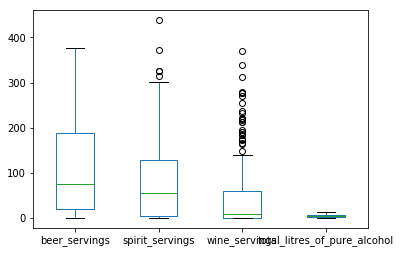

In [11]:
drinks.plot(kind='box')

In [18]:
ufo.Time.dt.month.astype('str').str.pad(width=2, fillchar='0').head()

0    06
1    06
2    02
3    06
4    04
Name: Time, dtype: object

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train['young_male'] = ((train.Sex =='male') & (train.Age < 30)).map({True:1, False:0})
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,young_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


#### Pandas merge() functionality

In [ ]:
left_df = pd.DataFrame({'key':range(5), 'left_val' : tuple('abcde')})
right_df = pd.DataFrame({'key':range(2,7), 'right_val' : tuple('fghij')})
print(left_df)
print(right_df)

In [ ]:
pd.merge(left_df, right_df,on='key', how='inner')  #Default inner join keeps on the intersection of keys of merging columns

In [ ]:
pd.merge(left_df, right_df,on='key', how='left')

In [ ]:
pd.merge(left_df, right_df,on='key', how='right')

In [ ]:
pd.merge(left_df, right_df,on='key', how='outer')

In [ ]:
#  Demonsstrating the concat functionlity of pandas
pd.concat([left_df,right_df], sort=True)

In [ ]:
concat_df = pd.concat([left_df,right_df],axis=1,sort=True)
concat_df

In [ ]:
concat_df['key']   # Notice we have 2 columns with 'key' name and on accessing both are displayed